<a href="https://www.kaggle.com/code/kishoreshanmugam/eda-feature-engineering-on-black-friday-data?scriptVersionId=136918980" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday/train.csv
/kaggle/input/black-friday/test.csv


## Black Friday Dataset EDA and Feature Engineering

Black Friday is a colloquial term for the Friday after Thanksgiving in the United States. It traditionally marks the start of the Christmas shopping season in the United States. Many stores offer highly promoted sales at discounted prices and often open early, sometimes as early as midnight or even on Thanksgiving.

In [2]:
## loading the python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Problem Statement

This is a Blackfriday Sales Data of (ABC) E commerce Website, using this Dataset we want to understand the purchasing behaviour of the customers of (ABC) E commerce Website (specifically, purchase amount) against various product of different categories. They have shared purchasing summary of various customers for selected high volume products from last months. The Dataset contains customer demographics (age, gender, maritial status, city_type, stay_in_current_city), product details (product_id and product_category) and Total_purchase_ amount from Last month.

Now, they want to build a model to predict the purchase amount to customer against products which will hepl them to create personalized offer for customers against different products.

In [3]:
# import the training dataset
df_train = pd.read_csv("/kaggle/input/black-friday/train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# import the test dataset
df_test = pd.read_csv("/kaggle/input/black-friday/test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


Merging the train and test data together, so we can perform the cleaning and all preprocessing of data together and the we can split the dataset randomly for models

In [5]:
# df_combined = df_train.append(df_test)
# df_combined

In [6]:
### Merging the train and test data together, so we can perform the cleaning and all preprocessing of data together and the we can split the dataset randomly for models

df_combined= pd.concat([df_train, df_test],axis=0, join='outer')
df_combined

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [7]:
## Identifying the basic Structure of the data
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
## Decribing the dataset numerical variable
df_combined.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
## Decribing the dataset numerical & categorical variable
df_combined.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667,783667,783667,783667.000000,783667,783667,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
unique,NaN,3677,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,2709,590031,313015,NaN,329739,276425,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.079300,NaN,NaN,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,NaN,NaN,NaN,6.522206,NaN,NaN,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [10]:
## dropping the unwanted columns from the dataset
df_combined.drop(['User_ID'],axis=1, inplace=True)
df_combined.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


We have three categorical feature that are available in the dataset, we have to make them as numerical before proceeding creating for model

In [11]:
#pd.get_dummies(df_combined['Gender'], drop_first=1)

In [12]:
# Handling the categorical Feature Gender
# changing the gender values for F = 0 and M=1

df_combined["Gender"] = df_combined["Gender"].map({"F":0, "M":1})
df_combined["Gender"].head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

In [13]:
df=df_combined

In [14]:
# Checking the unique values in age
df_combined['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
# Handling the categorical Feature age
# Changing the Age 0-17 = 1, 18-25 = 2, 26-35 = 3, 36-45 = 4, 46-50 = 5, 51-55 = 6, 55+ = 7
# This is a target ordinal encoding
df_combined['Age'] = df_combined['Age'].map({'0-17': 1,'18-25': 2, '26-35':3 , 
                                             '36-45': 4, '46-50' : 5, '51-55' : 6, '55+': 7})
df_combined['Age'].head()

0    1
1    1
2    1
3    1
4    7
Name: Age, dtype: int64

In [16]:
df_combined.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [17]:
## Sorting the issue with categorical variable "City_Category"
# we drop the first column because we can use remaining column for model if all column are zero model will assume it is different category
df_city = pd.get_dummies(df_combined["City_Category"], drop_first=True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [18]:
# Combining two dataset
df_combined = pd.concat([df_combined,df_city], axis=1)
df_combined.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [19]:
# Drop the city Category Feature
df_combined.drop('City_Category', axis=1, inplace=True)
df_combined.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [20]:
# Checking Stay_In_Current_City_Years for Unique Values
df_combined['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [21]:
## Sorting the issue with categorical variable "Stay_In_Current_City_Years"
df_combined['Stay_In_Current_City_Years'] = df_combined['Stay_In_Current_City_Years'].str.replace('+','')
df_combined['Stay_In_Current_City_Years'].head()

/tmp/ipykernel_21/2752684123.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_combined['Stay_In_Current_City_Years'] = df_combined['Stay_In_Current_City_Years'].str.replace('+','')


0    2
1    2
2    2
3    2
4    4
Name: Stay_In_Current_City_Years, dtype: object

In [22]:
# converting object into integer
df_combined['Stay_In_Current_City_Years'] = df_combined['Stay_In_Current_City_Years'].astype(int)

In [23]:
### Checking for missing values in dataset
df_combined.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [24]:

df_combined['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [25]:
df_combined['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [26]:
df_combined['Product_Category_2'].mode()[0]

8.0

In [27]:
# replacing the missing values in product categories with zeros
df_combined['Product_Category_2'] = df_combined['Product_Category_2'].fillna(0)

In [28]:
df_combined['Product_Category_2'].isnull().sum()

0

In [29]:
df_combined['Product_Category_2'].head()

0     0.0
1     6.0
2     0.0
3    14.0
4     0.0
Name: Product_Category_2, dtype: float64

In [30]:
df_combined['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [31]:
df_combined['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [32]:
df_combined['Product_Category_3'].mode()[0]

16.0

In [33]:
# Replace the missing `Product_Category_3` with zeros
df_combined['Product_Category_3'] = df_combined['Product_Category_3'].fillna(0)

In [34]:
df_combined['Product_Category_3'].head()

0     0.0
1    14.0
2     0.0
3     0.0
4     0.0
Name: Product_Category_3, dtype: float64

In [35]:
df_combined.shape

(783667, 12)

In [36]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 67.3+ MB


In [37]:
df_combined['B'] = df_combined['B'].astype(int)
df_combined['C'] = df_combined['C'].astype(int)

In [38]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


In [39]:
corrrelation_matrix = df_combined.corr()

/tmp/ipykernel_21/707776029.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrrelation_matrix = df_combined.corr()


### Visualization

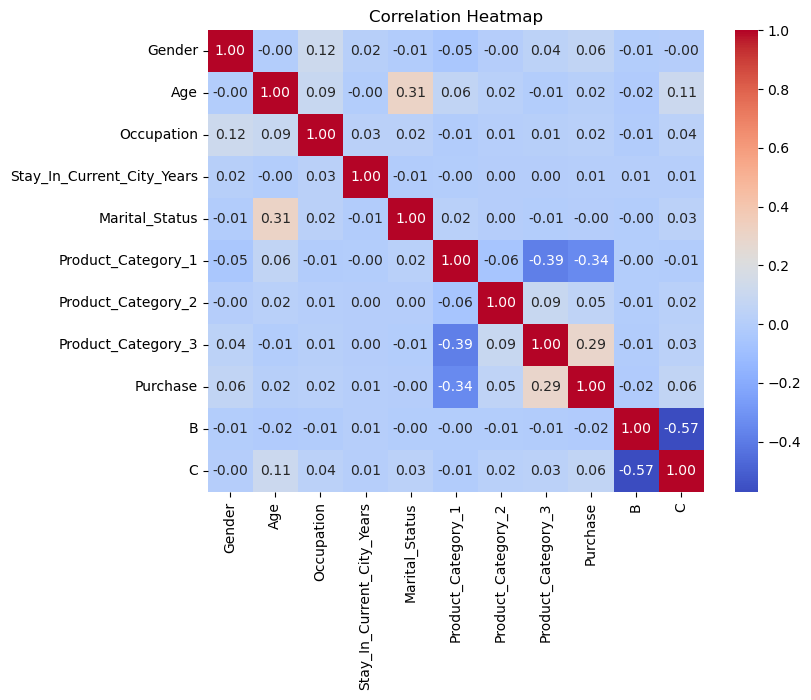

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(corrrelation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [41]:
### removing martial status, Stay_In_Current_City_Years  

df_combined.drop(['Marital_Status','Stay_In_Current_City_Years','Age'], axis=1, inplace=True)

/tmp/ipykernel_21/880594975.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_combined.corr()


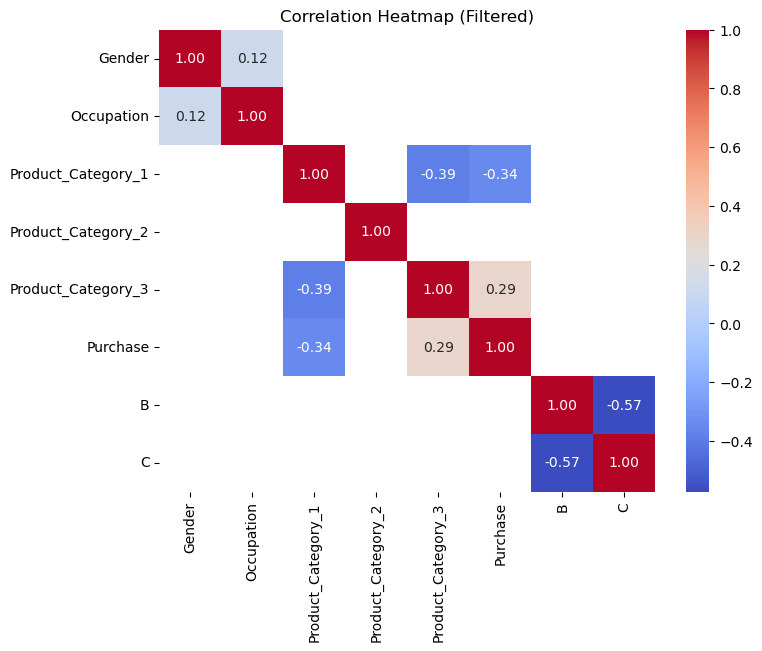

In [42]:
correlation_matrix = df_combined.corr()

# Set a threshold for near-zero correlations (e.g., 0.1)
threshold = 0.1

# Filter out correlations close to zero
correlation_matrix_filtered = correlation_matrix[abs(correlation_matrix) >= threshold]

# Visualize the correlation matrix without near-zero correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Filtered)")
plt.show()

In [43]:
#sns.pairplot(df_combined)

<Axes: xlabel='Age', ylabel='Purchase'>

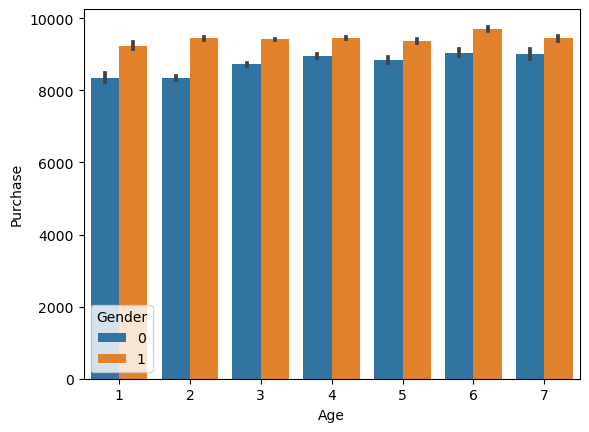

In [44]:
# this is the visualization of age vs purchase
sns.barplot(data=df, x='Age', y='Purchase', hue='Gender')

Observation:

* The Purchasing of men is high compared woman.
* purchasing between all age group is same

<Axes: xlabel='Occupation', ylabel='Purchase'>

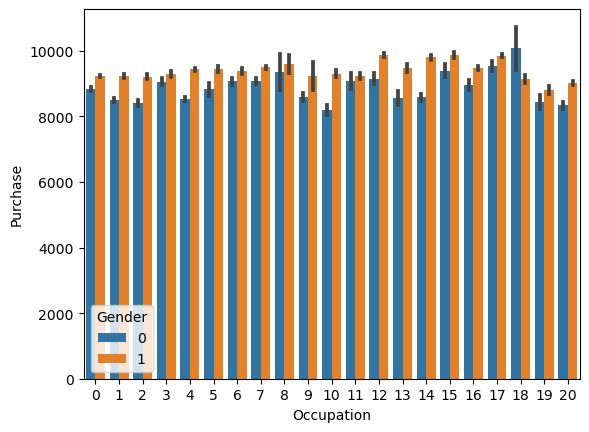

In [45]:
### Visualization of purchase using ocupation
sns.barplot(data=df, x='Occupation', y='Purchase', hue='Gender')

In [46]:
# removing occupation from dataset
df_combined.drop('Occupation', axis=1, inplace=True)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

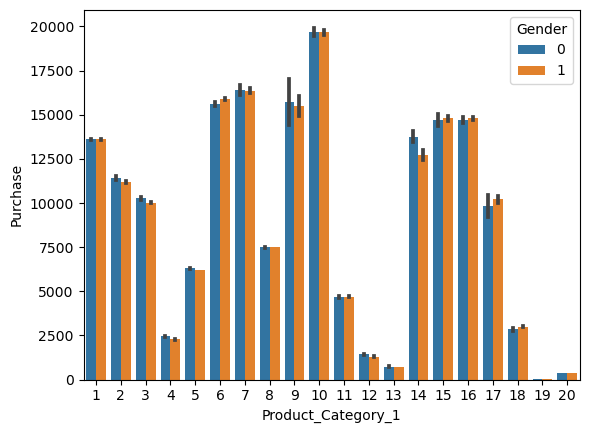

In [47]:
### Visualization of purchase using Product category 1

sns.barplot(data=df, x='Product_Category_1', y='Purchase', hue='Gender')

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

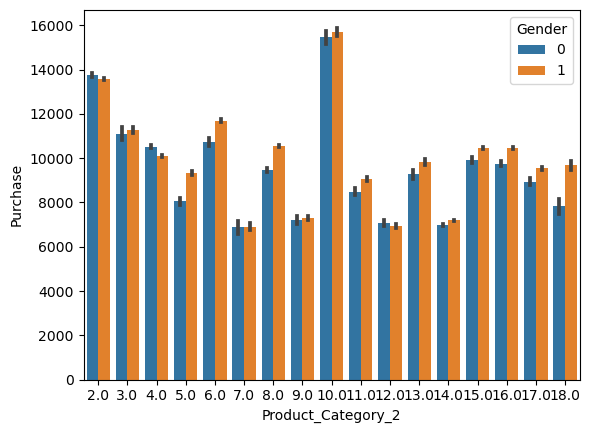

In [48]:
sns.barplot(data=df, x='Product_Category_2', y='Purchase', hue='Gender')

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

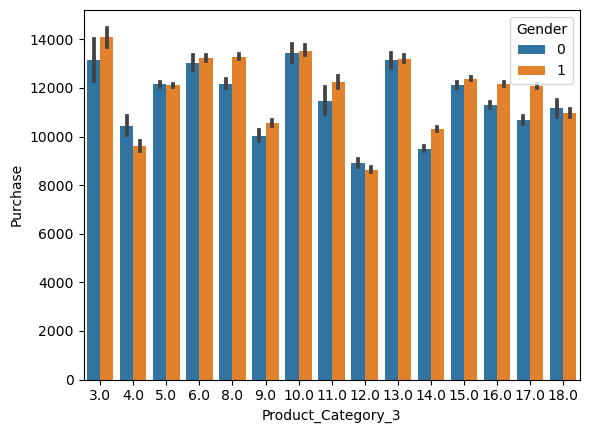

In [49]:
sns.barplot(data=df, x='Product_Category_3', y='Purchase', hue='Gender')

In [50]:
df_combined.drop('Product_ID', axis=1, inplace=True)

In [51]:
## Spliting the Test and Train data
df_combined['Purchase'].isnull().sum()

233599

In [52]:
df_test=df_combined[df_combined['Purchase'].isnull()]

In [53]:
df_train=df_combined[~df_combined['Purchase'].isnull()]

In [54]:
# defining x using df_train excluding purchase column
X = df_train.drop('Purchase', axis=1)

In [55]:
X.shape

(550068, 6)

In [56]:
y = df_train['Purchase']

In [57]:
y.shape

(550068,)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
### Feature Scaling
## for this we are using standard scalar methods X_scaled = (X - mean(X)) / std(X)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Developing a Model for Predicting Model

For Model we are going to use Linear regression model since we are predict the sales.

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [61]:
# Create a Linear Regression model
model = LinearRegression()

# Perform k-fold cross-validation to find the best model
k = 100
scores = cross_val_score(model, X_train, y_train, cv=k, scoring='r2')
best_r2 = np.max(scores)
best_model_index = np.argmax(best_r2)

# Fit the best model on the entire training data
best_model = LinearRegression()
best_model.fit(X_train, y_train)

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate R-squared on the test data
r2 = best_model.score(X_test, y_test)

print("Best R-squared from cross-validation:", best_r2)
print("R-squared on test data using the best model:", r2)

Best R-squared from cross-validation: 0.18232950015299454
R-squared on test data using the best model: 0.15032182162875107


In [62]:
# Calculate the squared errors
Squared_errrors = (y_pred - y_test) **2

mse =  np.mean(Squared_errrors)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 4620.515859190356
